# Support Vector Machine

**Support Vector Machine is a discriminative classifier that is formally designed by a separative hyperplane. It is a representation of examples as points in space that are mapped so that the points of different categories are separated by a gap as wide as possible.**

1. SVM represents each data point as a point in space.
Different categories of data are separated as well as possible.

2. It finds a hyperplane that best separates the classes.
The hyperplane is a decision boundary.

3. SVM chooses the hyperplane that creates the maximum margin between classes.
Margin means the distance from the hyperplane to the nearest data points.

4. The nearest data points that lie closest to the hyperplane are called support vectors.
These points influence the position and orientation of the hyperplane.

5. The goal is to widen the margin as much as possible because a larger margin improves classification accuracy and reduces error.

## SVM Kernels

1. **Linear Kernel**

- Used when data is linearly separable.

- Creates a straight hyperplane.

- Works well for high dimensional datasets like text classification.

2. **Radial Basis Function (RBF) Kernel**

- Used when data is non linear.

- Maps data into a higher dimensional space so a separating boundary can be found.

- Very powerful and commonly used.

3. **Polynomial Kernel**

- Creates curved or polynomial decision boundaries.

- Useful when relationships between features are polynomial in nature.

## SVM Use Cases

**Face Detection**
- Used to classify facial features and detect faces in images.

**Text and Hypertext Categorization**
- Helps in spam detection, document classification, and topic labeling.

**Classification of Images**
- Efficient for separating different image classes with high dimensional features.

**Bioinformatics**
- Applied in protein classification, gene expression analysis, and disease prediction.

**Remote Homology Detection**
- Used to identify evolutionary relationships between protein sequences.

**Handwriting Detection**
- Helps in recognizing handwritten digits and characters.

**Generalized Predictive Control**
- Supports decision making in advanced process control systems.

## How to Implement SVM

1. **Loading the Data**
- Import the dataset into your environment so that it can be processed and analyzed.

2. **Exploring the Data**
- Understand the dataset by checking its structure, summary statistics, missing values, and visualizations.

3. **Splitting Data**
- Divide the dataset into training and testing sets to evaluate the model's performance.

4. **Generating the Model**
- Use Support Vector Machine algorithms to train the model on the training data.

5. **Model Evaluation**
- Check the performance of the model using accuracy, confusion matrix, precision, recall, etc.

## Hands on Practical Implementation 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = iris["target"]

sentosa_or_versicolor = (y == 0) | (y == 1)
X = X[sentosa_or_versicolor]
y = y[sentosa_or_versicolor]

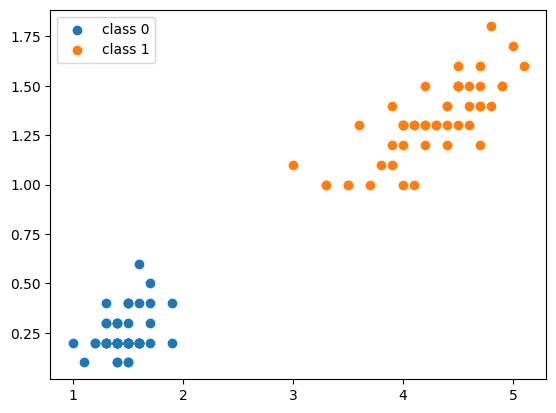

In [4]:
plt.scatter(X[:,0][y==0],X[:,1][y==0],label="class 0")
plt.scatter(X[:,0][y==1],X[:,1][y==1],label="class 1")
plt.legend()
plt.show()

In [5]:
# SVM Classifier Model
svm_clf = SVC(kernel="linear" , C=float("inf"))  #max c --> Hard Classifier
svm_clf.fit(X,y)

,C,inf
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
svm_clf.coef_  #Weight terms

array([[1.29411744, 0.82352928]])

In [7]:
svm_clf.intercept_ # bias term

array([-3.78823471])

In [9]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#FFAAAA")  # Highlight support vectors

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

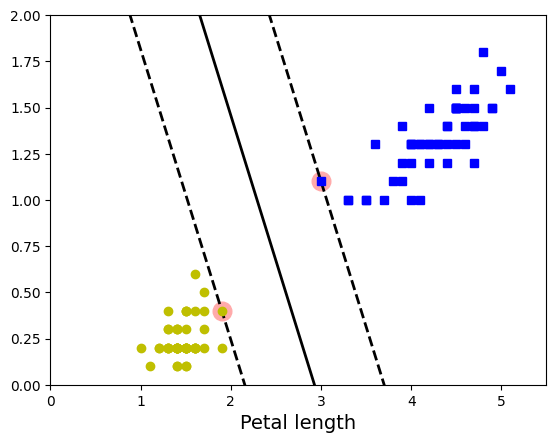

In [10]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")  # Blue squares for class 1
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")  # Yellow circles for class 0

plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [11]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

(np.float64(0.0), np.float64(6.0), np.float64(0.0), np.float64(90.0))

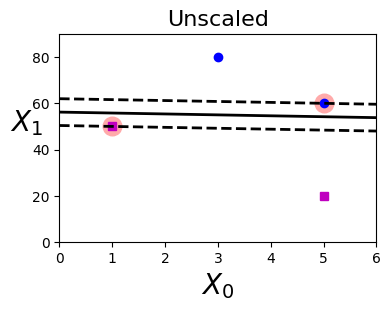

In [13]:
# Why Scaling is important
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 2.7))

plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$X_0$", fontsize=20)
plt.ylabel("$X_1$", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

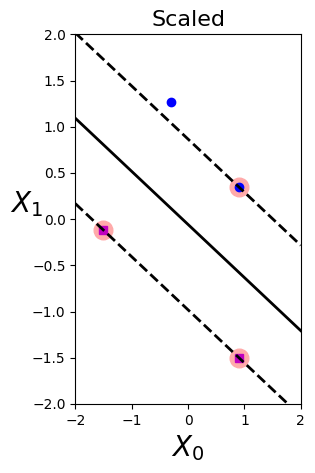

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("$X_0$", fontsize=20)
plt.ylabel("$X_1$", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## Non Linear Classifier

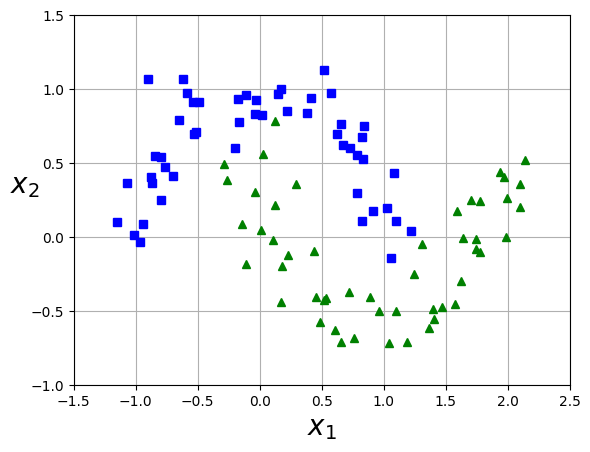

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


## Introducting Pipeline

In [18]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf_pipe", SVC(kernel="linear", C=100))
])

svm_pipe.fit(Xs, ys)

# Accessing individual model inside pipeline
svm_pipe["svm_clf_pipe"]

,C,100
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

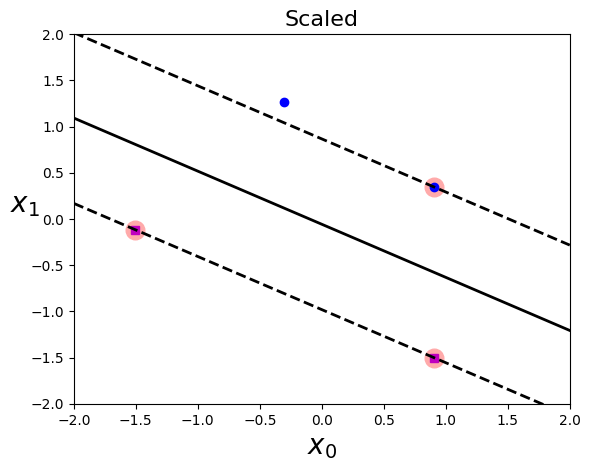

In [19]:
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")

plot_svc_decision_boundary(svm_pipe["svm_clf_pipe"], -2, 2)

plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## Polynomial Features

In [22]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(1, 4).reshape(-1, 1)
x

array([[1],
       [2],
       [3]])

In [23]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(x)  
# first column is bias term, remaining columns are weight terms (x, x**2)

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [24]:
pf = PolynomialFeatures(degree=3)   # Degree 3
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [25]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

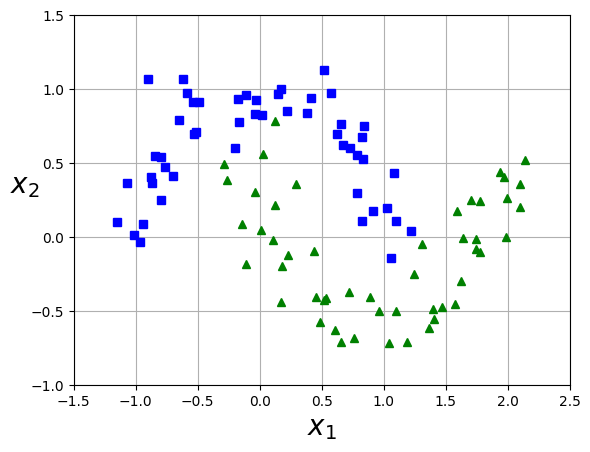

In [27]:
# Bring back non-linear classifier data

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=60)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")      # Blue squares for class 0
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")      # Green triangles for class 1
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


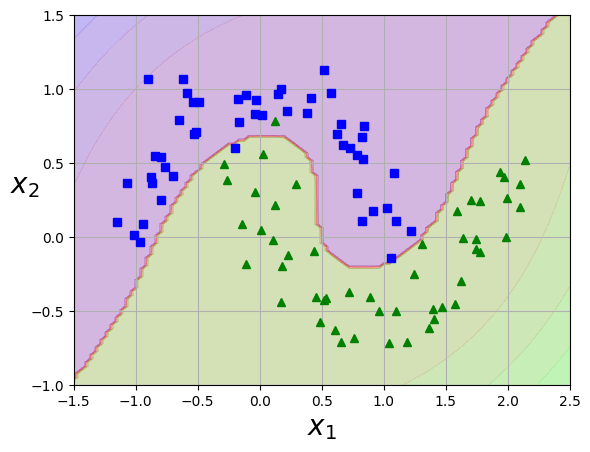

In [29]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# The End !!